In [1]:
!pip install truth-table-generator

You should consider upgrading via the 'c:\users\tanee\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [2]:
import ttg
import pandas as pd


In [3]:
datas = [{"group":"group0","AGE":"ANY",'disease':"ANY","hasCough":"ANY","hasFever":"ANY","tired":"ANY","hasCloser":"False","Travel":"False"},{"group":"group1","AGE":"ANY",'disease':"ANY","hasCough":"ANY","hasFever":"False","tired":"ANY","hasCloser":"True","Travel":"True"},{"group":"group1","AGE":"ANY",'disease':"ANY","hasCough":"False","hasFever":"True","tired":"False","hasCloser":"True","Travel":"True"}]

In [3]:
datas = [{"group":"group0","AGE":"ANY",'disease':"ANY","hasCough":"ANY","hasFever":"ANY","tired":"ANY","hasCloser":"False","Travel":"False","Relation":[["t1","t2","t5"]]},{"group":"group2","AGE":"ANY",'disease':"ANY","hasCough":"False","hasFever":"True","tired":"False","hasCloser":"True","Travel":"True","Relation":[["t1","t2","t5"]]}]

In [4]:
def checkOr(newDF2):
    arr = []
    for index, row in newDF2.iterrows():
        arr.append(row['hasCloser'] or  row['Travel'] )
    newDF2['hasCloserOrTravel']  = arr

#     newDF2['hasCloserOrTravel'] =  newDF2['hasCloser'] or newDF2['Travel']
    

In [5]:
import numpy as np
newDF = pd.DataFrame()
newDF2 = pd.DataFrame()
flag = False
cols2 = []
# mainCols = list(datas[0].keys())
# print(mainCols)
for data in datas:
    list2 = []
    Any = []
    notYet = []
    relation = []


    for i in data:
        if data[i] == 'ANY':
            Any.append(i)
        elif i != 'ANY' and i !=  "Relation" :
            notYet.append(i)
        elif i == "Relation":
            relation.append(data[i])
    truthTable = ttg.Truths(Any)
    df = truthTable.as_pandas()

    if flag == False:
        cols = df.columns
        cols = list(cols)
        cols = cols+notYet
#         print(cols)
        flag = True
        for arr in notYet:
            df[arr] = data[arr]
            head = list(df.columns)
    else:
        cols2 = df.columns
        cols2 = list(cols2)
        for i in cols:
            if i not in cols2:
                list2.append(i)
        for arr in list2:
            df[arr] = data[arr]
            head = list(df.columns)


    for i in notYet:
        colum = df.columns
    if len(relation) > 0:
        for i in range(len(relation)):
            for idxJ, j in enumerate(relation[i]):

                head = head +j

                listDF = df.to_numpy()
                newList = []
                for idxK, k in enumerate(listDF):
#                     print(listDF)
                    for idx, val in enumerate(j):
                        for idxM, m in enumerate(j):
                            if idx == idxM:
                                newList.append("True")
                            else :
                                newList.append("False")
#                         print(k)
                        newList = np.append(k,newList)
                        if newDF2.empty:
                            newDF2 = pd.DataFrame([newList], 
                         columns=[head])
                        else :
                            newDF2.loc[len(newDF2)]=newList
                        newList = []
    else:
        if newDF2.empty:
            newDF2 = df
        else:
            newDF2 = newDF2.append(df,ignore_index=True)
        
checkOr(newDF2)






    


In [6]:
newDF2

,AGE,disease,hasCough,hasFever,tired,group,hasCloser,Travel,hasCloserOrTravel
0,1,1,1,1,1,group0,False,False,False
1,1,1,1,1,0,group0,False,False,False
2,1,1,1,0,1,group0,False,False,False
3,1,1,1,0,0,group0,False,False,False
4,1,1,0,1,1,group0,False,False,False
5,1,1,0,1,0,group0,False,False,False
6,1,1,0,0,1,group0,False,False,False
7,1,1,0,0,0,group0,False,False,False
8,1,0,1,1,1,group0,False,False,False
9,1,0,1,1,0,group0,False,False,False


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 

In [9]:
newDF2 = newDF2.replace("True", 1)
newDF2 = newDF2.replace("False", 0)
# newDF2newDF2 = newDF.replace("group0", 0)
newDF2 = newDF2.replace("group0", 0)
newDF2 = newDF2.replace("group1", 1)
newDF2 = newDF2.replace("group2", 2)

In [10]:
newDF2

,AGE,disease,hasCough,hasFever,tired,group,hasCloser,Travel,hasCloserOrTravel
0,1,1,1,1,1,0,0,0,0
1,1,1,1,1,0,0,0,0,0
2,1,1,1,0,1,0,0,0,0
3,1,1,1,0,0,0,0,0,0
4,1,1,0,1,1,0,0,0,0
5,1,1,0,1,0,0,0,0,0
6,1,1,0,0,1,0,0,0,0
7,1,1,0,0,0,0,0,0,0
8,1,0,1,1,1,0,0,0,0
9,1,0,1,1,0,0,0,0,0


In [11]:
import csv
with open('dataset4.csv', newline='',encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    dict1 = {}
    newList = []
    for row in reader:
        dict1['hasCloser'] = row['isCloseToCovid19Patient']
        dict1['disease'] = row['haveUnderlyingDisease']
        dict1['hasFever'] = row['haveFever']
        dict1['tired'] = row['haveTired']
        dict1['Travel'] = row['isTravelToCovid19Country']
        dict1['group'] = row['outcome']
        dict1['hasCough'] = row['haveCough']
        dict1['AGE'] = row['ageGroup']
        newList.append(dict1)
        dict1 = {}
print(newList)


[{'hasCloser': 'FALSE', 'disease': 'FALSE', 'hasFever': 'TRUE', 'tired': 'TRUE', 'Travel': 'TRUE', 'group': 'GROUP1p1', 'hasCough': 'TRUE', 'AGE': 'OLD_ADULT'}, {'hasCloser': 'FALSE', 'disease': 'FALSE', 'hasFever': 'TRUE', 'tired': 'TRUE', 'Travel': 'TRUE', 'group': 'GROUP1p1', 'hasCough': 'TRUE', 'AGE': 'MIDDLE_AGED_ADULT'}, {'hasCloser': 'FALSE', 'disease': 'FALSE', 'hasFever': 'TRUE', 'tired': 'TRUE', 'Travel': 'TRUE', 'group': 'GROUP1p1', 'hasCough': 'TRUE', 'AGE': 'YOUNG_ADULT'}, {'hasCloser': 'TRUE', 'disease': 'FALSE', 'hasFever': 'TRUE', 'tired': 'TRUE', 'Travel': 'TRUE', 'group': 'GROUP1p1', 'hasCough': 'TRUE', 'AGE': 'YOUNG_ADULT'}, {'hasCloser': 'TRUE', 'disease': 'FALSE', 'hasFever': 'TRUE', 'tired': 'TRUE', 'Travel': 'TRUE', 'group': 'GROUP1p1', 'hasCough': 'TRUE', 'AGE': 'YOUNG_ADULT'}, {'hasCloser': 'TRUE', 'disease': 'TRUE', 'hasFever': 'TRUE', 'tired': 'TRUE', 'Travel': 'TRUE', 'group': 'GROUP1p1', 'hasCough': 'TRUE', 'AGE': 'JUNIOR'}, {'hasCloser': 'TRUE', 'disease':

In [12]:
df = pd.DataFrame.from_dict(newList)
df

,hasCloser,disease,hasFever,tired,Travel,group,hasCough,AGE
0,FALSE,FALSE,TRUE,TRUE,TRUE,GROUP1p1,TRUE,OLD_ADULT
1,FALSE,FALSE,TRUE,TRUE,TRUE,GROUP1p1,TRUE,MIDDLE_AGED_ADULT
2,FALSE,FALSE,TRUE,TRUE,TRUE,GROUP1p1,TRUE,YOUNG_ADULT
3,TRUE,FALSE,TRUE,TRUE,TRUE,GROUP1p1,TRUE,YOUNG_ADULT
4,TRUE,FALSE,TRUE,TRUE,TRUE,GROUP1p1,TRUE,YOUNG_ADULT
...,...,...,...,...,...,...,...,...
2705,FALSE,FALSE,FALSE,FALSE,FALSE,GROUP4,FALSE,JUNIOR
2706,FALSE,FALSE,FALSE,FALSE,FALSE,GROUP4,FALSE,MIDDLE_AGED_ADULT
2707,FALSE,FALSE,FALSE,TRUE,FALSE,GROUP4,FALSE,MIDDLE_AGED_ADULT
2708,FALSE,FALSE,FALSE,FALSE,FALSE,GROUP4,FALSE,OLD_ADULT


In [13]:
df = df.replace("TRUE", 1)
df = df.replace("FALSE", 0)
df = df.replace("SENIOR", 1)
df = df.replace("OLD_ADULT", 1)
df = df.replace("MIDDLE_AGED_ADULT", 0)
df = df.replace("YOUNG_ADULT", 0)
df = df.replace("JUNIOR", 0)
df = df.replace("ELDER", 1)
df = df.replace("GROUP1p1", 4)
df = df.replace("GROUP1p2", 3)
df = df.replace("GROUP2", 2)
df = df.replace("GROUP3", 1)
df = df.replace("GROUP4", 0)

In [14]:
df[df['hasFever'] == ''].index

Int64Index([1521, 1522, 1523, 2400, 2401, 2402], dtype='int64')

In [15]:

df = df.drop([2403,1522, 1523, 2401, 2402,1524,1521,2400]).reset_index()

In [16]:
for i in df['hasFever']:
    if i == '':
        print(i)

In [17]:
df.astype('int32').dtypes

index        int32
hasCloser    int32
disease      int32
hasFever     int32
tired        int32
Travel       int32
group        int32
hasCough     int32
AGE          int32
dtype: object

In [18]:
df = df.drop(['index'], axis='columns')

In [19]:
df

,hasCloser,disease,hasFever,tired,Travel,group,hasCough,AGE
0,0,0,1,1,1,4,1,1
1,0,0,1,1,1,4,1,0
2,0,0,1,1,1,4,1,0
3,1,0,1,1,1,4,1,0
4,1,0,1,1,1,4,1,0
...,...,...,...,...,...,...,...,...
2697,0,0,0,0,0,0,0,0
2698,0,0,0,0,0,0,0,0
2699,0,0,0,1,0,0,0,0
2700,0,0,0,0,0,0,0,1


In [20]:

arr = []
for index, row in df.iterrows():
    arr.append(row['hasCloser'] or  row['Travel'] )
df['hasCloserOrTravel']  = arr

#     newDF2['hasCloserOrTravel'] =  newDF2['hasCloser'] or newDF2['Travel']
    

In [21]:
df

,hasCloser,disease,hasFever,tired,Travel,group,hasCough,AGE,hasCloserOrTravel
0,0,0,1,1,1,4,1,1,1
1,0,0,1,1,1,4,1,0,1
2,0,0,1,1,1,4,1,0,1
3,1,0,1,1,1,4,1,0,1
4,1,0,1,1,1,4,1,0,1
...,...,...,...,...,...,...,...,...,...
2697,0,0,0,0,0,0,0,0,0
2698,0,0,0,0,0,0,0,0,0
2699,0,0,0,1,0,0,0,0,0
2700,0,0,0,0,0,0,0,1,0


In [22]:
a0 = df[df.group == 0]
a1 = df[df.group == 1]
a2 = df[df.group == 2]
a3 = df[df.group == 3]
a4 = df[df.group == 4]

In [23]:
print(len(a0))
print(len(a1))
print(len(a2))
print(len(a3))
print(len(a4))


2044
627
10
6
15


In [24]:
for i in a1['hasCloser']:
    if i == 0:
        print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [25]:
a1.head(5)

,hasCloser,disease,hasFever,tired,Travel,group,hasCough,AGE,hasCloserOrTravel
31,0,0,0,0,1,1,1,0,1
32,0,0,0,0,1,1,0,1,1
33,0,0,0,0,1,1,0,0,1
34,1,0,0,0,0,1,0,0,1
35,0,1,0,0,1,1,0,0,1


In [26]:
a2.head(5)

,hasCloser,disease,hasFever,tired,Travel,group,hasCough,AGE,hasCloserOrTravel
21,1,0,1,1,1,2,0,0,1
22,1,0,1,1,0,2,0,0,1
23,0,0,1,0,1,2,1,0,1
24,1,0,1,1,1,2,0,0,1
25,1,0,1,1,1,2,0,0,1


In [27]:
a3.head(5)

,hasCloser,disease,hasFever,tired,Travel,group,hasCough,AGE,hasCloserOrTravel
15,1,0,1,0,0,3,1,1,1
16,0,0,1,0,1,3,0,1,1
17,1,0,1,0,1,3,0,1,1
18,1,0,1,0,1,3,0,1,1
19,1,0,1,0,0,3,1,1,1


In [28]:
colss = newDF2.columns


In [29]:
newcol = []
for col in colss:
    if col != 'group':
        newcol.append(col)
newcol

['AGE',
 'disease',
 'hasCough',
 'hasFever',
 'tired',
 'hasCloser',
 'Travel',
 'hasCloserOrTravel']

In [30]:
col = ['AGE', 'disease', 'hasCough', 'hasFever', 'tired', 'hasCloser',
       'Travel','t1','t2','t5']

In [31]:
col = newcol

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50, max_depth=None,
    min_samples_split=2, random_state=0)
XX =newDF2[newcol]
yy = newDF2['group']

In [33]:
model.fit(XX,yy)

RandomForestClassifier(n_estimators=50, random_state=0)

In [34]:
print("accuracy MLP train :{:.3f}".format(model.score(XX, yy)))


accuracy MLP train :1.000


In [35]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [36]:
newDF2

,AGE,disease,hasCough,hasFever,tired,group,hasCloser,Travel,hasCloserOrTravel
0,1,1,1,1,1,0,0,0,0
1,1,1,1,1,0,0,0,0,0
2,1,1,1,0,1,0,0,0,0
3,1,1,1,0,0,0,0,0,0
4,1,1,0,1,1,0,0,0,0
5,1,1,0,1,0,0,0,0,0
6,1,1,0,0,1,0,0,0,0
7,1,1,0,0,0,0,0,0,0
8,1,0,1,1,1,0,0,0,0
9,1,0,1,1,0,0,0,0,0


In [37]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict([[0,0,0,0,0,0,0]])
print(result)

ValueError: X has 7 features, but DecisionTreeClassifier is expecting 8 features as input.

In [527]:
print("accuracy DT test : {:.3f}".format(loaded_model.score(X_test, y_test)))

ValueError: Classification metrics can't handle a mix of unknown and binary targets

In [493]:
# y_predict = model.predict([[1,1,1,1,1,1,1,1,1,1,1]])


In [494]:
y_predict[0]

NameError: name 'y_predict' is not defined

In [ ]:

a = pd.crosstab(yy,y_predict)

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.3, random_state=0)

In [ ]:
# 3.2) Standardize data
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std  = sc.transform(X_test)

In [ ]:
# ############ Decision Tree ###############             

# 4) initialize Decision Tree model
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(criterion="entropy")
#
# criterion{“gini”, “entropy”}, default=”gini”. The function to measure the quality of a split.
# Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

# 5) Train model
dt.fit(X_train_std, y_train)

In [ ]:
# 6) predict

y_predict = dt.predict(X_test_std)

# Accuracy
# print("training accuracy: ", dt.score(X_train_std,y_train)) 
# print("testing accuracy: ", dt.score(X_test_std,y_test))         

print("accuracy DT train: {:.3f}".format(dt.score(X_train_std, y_train)))
print("accuracy DT test : {:.3f}".format(dt.score(X_test_std, y_test)))

plt.figure(figsize=(12, 10))
plot_tree(dt, filled=True)
plt.show()

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from matplotlib import pyplot as plt
%matplotlib inline

In [34]:
df = df.reindex(sorted(df.columns), axis=1)
newDF2 = newDF2.reindex(sorted(newDF2.columns), axis=1)

In [35]:
len(df)

2702

In [689]:
type(newDF2['AGE'])

pandas.core.series.Series

In [690]:
type(df['AGE'])

pandas.core.series.Series

In [29]:
df0 = newDF2[newDF2.group == 'group1']
df1 = newDF2[newDF2.group == 1]
df2 = newDF2[newDF2.group == 2]

In [692]:
d0 = df[df.group == 0]
d1 = df[df.group == 1]
d2 = df[df.group == 2]

In [30]:
df0 #### เก็บแยก ดีบี ว่าอันไหน ออ อะไร แล้ว มาออหลังสุด

,AGE,disease,hasCough,hasFever,tired,vomit,group,hasCloser,Travel
64,1,1,1,False,1,True,group1,True,True
65,1,1,1,False,0,True,group1,True,True
66,1,1,0,False,1,True,group1,True,True
67,1,1,0,False,0,True,group1,True,True
68,1,0,1,False,1,True,group1,True,True
69,1,0,1,False,0,True,group1,True,True
70,1,0,0,False,1,True,group1,True,True
71,1,0,0,False,0,True,group1,True,True
72,0,1,1,False,1,True,group1,True,True
73,0,1,1,False,0,True,group1,True,True


In [693]:
d0

,AGE,Travel,disease,group,hasCloser,hasCough,hasFever,tired
658,0,0,0,0,0,1,0,0
659,0,0,0,0,0,1,0,1
660,0,0,0,0,0,1,0,0
661,1,0,0,0,0,0,0,0
662,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...
2697,0,0,0,0,0,0,0,0
2698,0,0,0,0,0,0,0,0
2699,0,0,0,0,0,0,0,1
2700,1,0,0,0,0,0,0,0


In [694]:
df1.columns

Index(['AGE', 'Travel', 'disease', 'group', 'hasCloser', 'hasCough',
       'hasFever', 'tired'],
      dtype='object')

In [37]:
df.columns

Index(['AGE', 'Travel', 'disease', 'group', 'hasCloser', 'hasCloserOrTravel',
       'hasCough', 'hasFever', 'index', 'tired'],
      dtype='object')

NameError: name 'df0' is not defined

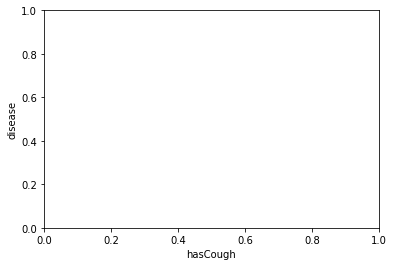

In [38]:
plt.xlabel('hasCough')
plt.ylabel('disease')
plt.scatter(df0['tired'], df0['disease'], color='red', marker='*')
plt.scatter(df1['tired'], df1['disease'], color='green', marker='+')
plt.scatter(df2['tired'], df2['disease'], color='blue', marker='.')

In [114]:
y_train = newDF2.group
X_train = newDF2.drop(['group'], axis='columns')

In [116]:
X_test  = df.drop(['group'], axis='columns')
y_test = df.group

In [699]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [117]:
X_test['AGE'] = pd.Series(X_test['AGE'], dtype="int64")
X_test['Travel'] = pd.Series(X_test['Travel'], dtype="int64")
X_test['disease'] = pd.Series(X_test['disease'], dtype="int64")
X_test['hasCloser'] = pd.Series(X_test['hasCloser'], dtype="int64")
X_test['hasCough'] = pd.Series(X_test['hasCough'], dtype="int64")
X_test['hasFever'] = pd.Series(X_test['hasFever'], dtype="int64")
X_test['tired'] = pd.Series(X_test['tired'], dtype="int64")


In [51]:
y_test= pd.Series(y_test, dtype="int64")

In [118]:
X_train

,AGE,disease,hasCough,hasFever,tired,hasCloser,Travel,hasCloserOrTravel
0,1,1,1,1,1,0,0,0
1,1,1,1,1,0,0,0,0
2,1,1,1,0,1,0,0,0
3,1,1,1,0,0,0,0,0
4,1,1,0,1,1,0,0,0
5,1,1,0,1,0,0,0,0
6,1,1,0,0,1,0,0,0
7,1,1,0,0,0,0,0,0
8,1,0,1,1,1,0,0,0
9,1,0,1,1,0,0,0,0


In [122]:
model = SVC(kernel='linear')

In [123]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [75]:
# predictions = model.predict([[0,1,1,1,0,0,0]])
# print(predictions)

In [124]:
X_test

,hasCloser,disease,hasFever,tired,Travel,hasCough,AGE,hasCloserOrTravel
0,0,0,1,1,1,1,1,1
1,0,0,1,1,1,1,0,1
2,0,0,1,1,1,1,0,1
3,1,0,1,1,1,1,0,1
4,1,0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...
2697,0,0,0,0,0,0,0,0
2698,0,0,0,0,0,0,0,0
2699,0,0,0,1,0,0,0,0
2700,0,0,0,0,0,0,1,0


In [125]:
y_test.astype('int32').dtypes

dtype('int32')

In [126]:
print("accuracy DT train: {:.3f}".format(model.score(X_train, y_train)))

accuracy DT train: 1.000


In [127]:
X_test

,hasCloser,disease,hasFever,tired,Travel,hasCough,AGE,hasCloserOrTravel
0,0,0,1,1,1,1,1,1
1,0,0,1,1,1,1,0,1
2,0,0,1,1,1,1,0,1
3,1,0,1,1,1,1,0,1
4,1,0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...
2697,0,0,0,0,0,0,0,0
2698,0,0,0,0,0,0,0,0
2699,0,0,0,1,0,0,0,0
2700,0,0,0,0,0,0,1,0


In [128]:

X_test.dtypes

hasCloser            int64
disease              int64
hasFever             int64
tired                int64
Travel               int64
hasCough             int64
AGE                  int64
hasCloserOrTravel    int64
dtype: object

In [129]:
df

,hasCloser,disease,hasFever,tired,Travel,group,hasCough,AGE,hasCloserOrTravel
0,0,0,1,1,1,4,1,1,1
1,0,0,1,1,1,4,1,0,1
2,0,0,1,1,1,4,1,0,1
3,1,0,1,1,1,4,1,0,1
4,1,0,1,1,1,4,1,0,1
...,...,...,...,...,...,...,...,...,...
2697,0,0,0,0,0,0,0,0,0
2698,0,0,0,0,0,0,0,0,0
2699,0,0,0,1,0,0,0,0,0
2700,0,0,0,0,0,0,0,1,0


In [153]:
predictions = model.predict(X_test)
print(predictions)

[1 1 1 ... 0 0 0]


In [154]:
predictions

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [149]:
X_test

,hasCloser,disease,hasFever,tired,Travel,hasCough,AGE,hasCloserOrTravel
0,0,0,1,1,1,1,1,1
1,0,0,1,1,1,1,0,1
2,0,0,1,1,1,1,0,1
3,1,0,1,1,1,1,0,1
4,1,0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...
2697,0,0,0,0,0,0,0,0
2698,0,0,0,0,0,0,0,0
2699,0,0,0,1,0,0,0,0
2700,0,0,0,0,0,0,1,0


In [150]:
y_test

0       4
1       4
2       4
3       4
4       4
       ..
2697    0
2698    0
2699    0
2700    0
2701    0
Name: group, Length: 2702, dtype: object

In [148]:
percentage = model.score(X_test, y_test)

ValueError: Classification metrics can't handle a mix of unknown and binary targets

In [155]:
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, predictions)
print("Confusion Matrix")
print(res)
# print(f"Test Set: {len(X_test)}")
# print(f"Accuracy = {percentage*100} %")

ValueError: Classification metrics can't handle a mix of unknown and binary targets

In [649]:
X_train.head(5)

,AGE,Travel,disease,hasCloser,hasCough,hasFever,tired
0,1,0,1,0,1,1,1
1,1,0,1,0,1,1,0
2,1,0,1,0,1,0,1
3,1,0,1,0,1,0,0
4,1,0,1,0,0,1,1


In [650]:
X_test.head(5)

,AGE,Travel,disease,hasCloser,hasCough,hasFever,tired
0,1,1,0,0,1,1,1
1,0,1,0,0,1,1,1
2,0,1,0,0,1,1,1
3,0,1,0,1,1,1,1
4,0,1,0,1,1,1,1


In [651]:
y_train.head(5)

0    1
1    1
2    1
3    1
4    1
Name: group, dtype: int64

In [652]:
y_test.head(5)

0    4
1    4
2    4
3    4
4    4
Name: group, dtype: int64

In [12]:
print(ttg.Truths(['p', 'q'], ['p and q', 'p or q', '(p or (~q)) => (~p)'], ints=False))

+-------+-------+-----------+----------+-----------------------+
|   p   |   q   |  p and q  |  p or q  |  (p or (~q)) => (~p)  |
|-------+-------+-----------+----------+-----------------------|
| True  | True  |   True    |   True   |         False         |
| True  | False |   False   |   True   |         False         |
| False | True  |   False   |   True   |         True          |
| False | False |   False   |  False   |         True          |
+-------+-------+-----------+----------+-----------------------+


In [13]:
ttg

<module 'ttg' from 'c:\\users\\tanee\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\ttg\\__init__.py'>

In [11]:
tt = ttg.Truths(['Travel', 'Closer'], [ 'Travel or Closer'], ints=False)

AttributeError: 'DataFrame' object has no attribute 'Truths'

In [9]:
tf = tt.as_pandas()

In [15]:
tf

,Travel,Closer,Travel or Closer
1,True,True,True
2,True,False,True
3,False,True,True
4,False,False,False


In [774]:
newDF2

,AGE,disease,hasCough,hasFever,tired,group,hasCloser,Travel
0,1,1,1,1,1,group0,False,False
1,1,1,1,1,0,group0,False,False
2,1,1,1,0,1,group0,False,False
3,1,1,1,0,0,group0,False,False
4,1,1,0,1,1,group0,False,False
5,1,1,0,1,0,group0,False,False
6,1,1,0,0,1,group0,False,False
7,1,1,0,0,0,group0,False,False
8,1,0,1,1,1,group0,False,False
9,1,0,1,1,0,group0,False,False


In [156]:
a = pd.DataFrame()

In [180]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


In [181]:

df = df.append({'A': "A"}, ignore_index=True)


In [182]:
df

,col1,col2,A
0,1.0,3.0,NaN
1,2.0,4.0,NaN
2,NaN,NaN,A
